<a href="https://colab.research.google.com/github/wanwanliang/Image_Processing_and_Deep_Neurals/blob/master/Weed_Detection_Keras_RetinaNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setup
Download and install in Colab required packages and import libraries.

In [1]:
import numpy as np
import pandas as pd
import os, shutil, urllib
import matplotlib.pyplot as plt
#import keras
#import rasterio
#from keras_unet.models import satellite_unet
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#!pip uninstall tensorflow -y
#!pip install  tensorflow==2.2.0
%tensorflow_version 2.2
import tensorflow 
print(tensorflow.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.2`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.2.0


In [3]:
!pip3 install keras==2.3.1
#!git clone https://github.com/fizyr/keras-retinanet.git
#%cd keras-retinanet/
#!pip install .
#!python setup.py build_ext --inplace

     |████████████████████████████████| 378kB 8.7MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


# Generate more image samples

In [17]:
os.chdir('/content/drive//My Drive/turf_weed/synthetic-images')
os.chdir('/content/drive//My Drive/turf_weed/keras-retinanet/TrainingImages')
#!python create.py -obj val/ -o ValImages/ -ann True -g True
#!python create.py --ann True --g True
from skimage import filters, io
files = os.listdir()
files[0:5]

for file in files:
  im = io.imread(file)
  nm = "im" + file[0:-3] + 'jpg'
  io.imsave(nm, im)

# Training Model


## Load/install packages

In [3]:
!pip install keras_resnet
!pip install keras_retinanet

import keras_retinanet
import keras_resnet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
#from keras_retinanet.utils.gpu import setup_gpu
from keras_retinanet.models import load_model
# import miscellaneous modules
import cv2
import time

  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20487 sha256=95e4b4c5db0e985c8f7f6c293ab4bdeb49ce2067d5627965fed38ef0318c1a7c
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-resnet
     |████████████████████████████████| 61kB 4.3MB/s 
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=154841 sha256=9d51bbc48fadf6888a847876df599685c0d20c5203a2b757213da4925b1c3968
  Stored in directory: /root/.cache/pip/wheels/d9/a5/98/87f8ed08913b184bb625dde1c1277a4dfe969c77b377abde69
Successfully built keras-retinanet


## Download or load pretrained deep lerning model

In [4]:
os.chdir('/content/drive/My Drive/turf_weed/keras-retinanet')

PRETRAINED_MODEL = './snapshots/resnet50_coco.h5'

URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

('./snapshots/resnet50_coco.h5', <http.client.HTTPMessage at 0x7f0a2ecb72b0>)

## Training model

In [6]:
!python3 keras_retinanet/bin/train.py --weights {PRETRAINED_MODEL} --lr 1e-4 --tensorboard-dir output/ --snapshot-path output/snapshots --random-transform --batch-size 16 --steps 100 --epochs 200 csv annotations_tr.csv classes.csv --val-annotations annotations_va.csv

Using TensorFlow backend.
Creating model, this may take a second...
2020-08-04 06:40:57.859435: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-08-04 06:40:57.914811: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-04 06:40:57.915393: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-08-04 06:40:57.915740: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-08-04 06:40:58.185064: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas

#Convert best trained model into inference model to make predictions/detections



In [4]:
os.chdir('/content/drive/My Drive/turf_weed/keras-retinanet')
!python3 keras_retinanet/bin/convert_model.py output/snapshots/resnet50_csv_14.h5 output/modelBest2.h5

Using TensorFlow backend.
2020-08-04 13:26:13.902313: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-08-04 13:26:13.915956: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-04 13:26:13.916581: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-08-04 13:26:13.916865: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-08-04 13:26:13.924583: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-08-04 13:26:13.926497: I tenso

# Prediction1-- Load best model for prediction

## load packages and set session



In [5]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%reload_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import json
from random import shuffle
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.compat.v1.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
tf.compat.v1.keras.backend.set_session(get_session())

Using TensorFlow backend.


## Load best model

In [6]:
os.chdir('/content/drive/My Drive/turf_weed/keras-retinanet')


PRETRAINED_MODEL = './output/modelBest2.h5'

from keras_retinanet.models import load_model
model = load_model(PRETRAINED_MODEL, backbone_name='resnet50')

CLASSES_FILE = "classes.csv"
# load label to names mapping for visualization purposes
labels_to_names = pd.read_csv(CLASSES_FILE,header=None).T.loc[0].to_dict()

tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


## Load image for testing and visualization

In [10]:
# load imagery
os.chdir('/content/drive/My Drive/turf_weed/keras-retinanet')

image_dir = "test/"

image_list = []
for root, dirs, files in os.walk(image_dir):  
    for filename in files:
        if filename.lower().endswith(('.jpg')):
            image_list.append(image_dir + filename)
print(len(image_list))
image_list = image_list[5:14]
print(len(image_list))
image_list

14
9


['test/im80.jpg',
 'test/im90.jpg',
 'test/test1.jpg',
 'test/test2.jpg',
 'test/test7.jpg',
 'test/test3.jpg',
 'test/test6.jpg',
 'test/test5.jpg',
 'test/test4.jpg']

## Run detections on all tiles and Visualize detection results



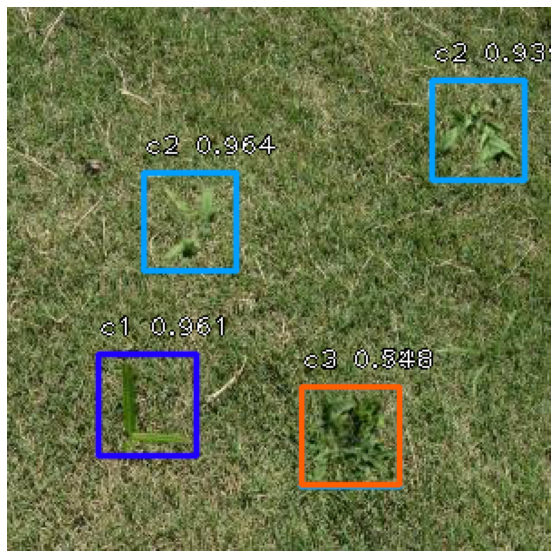

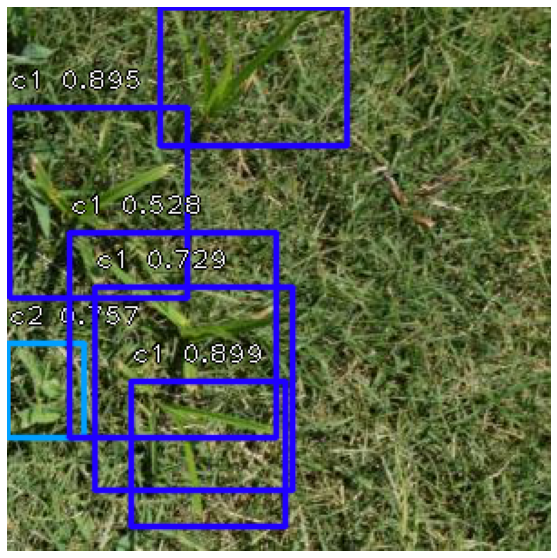

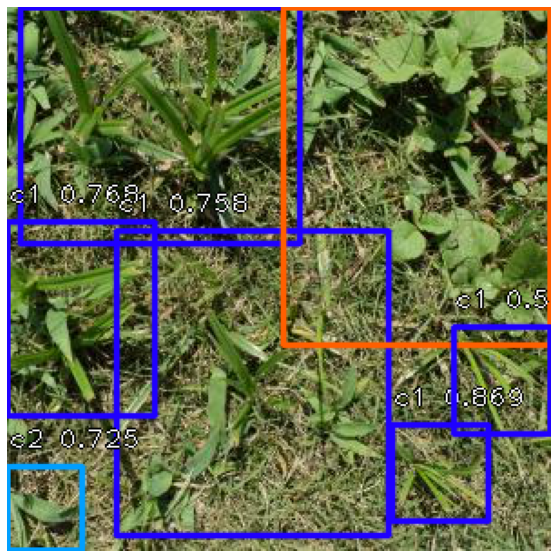

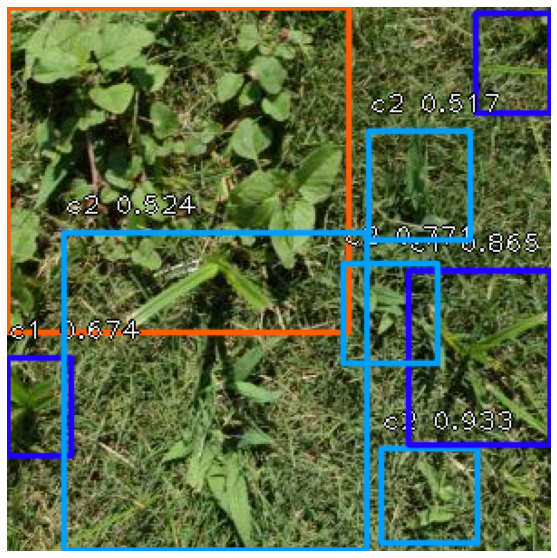

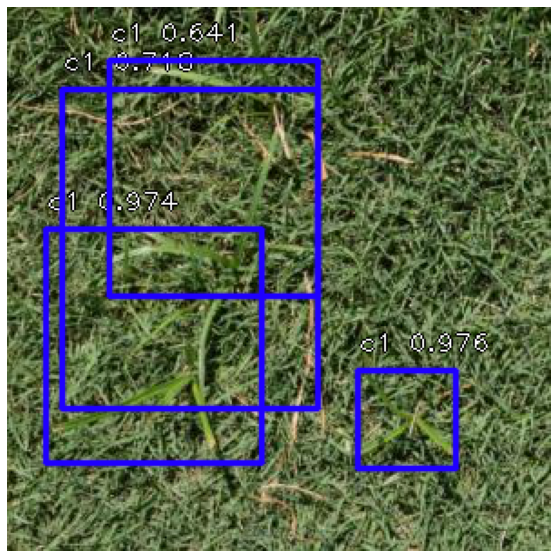

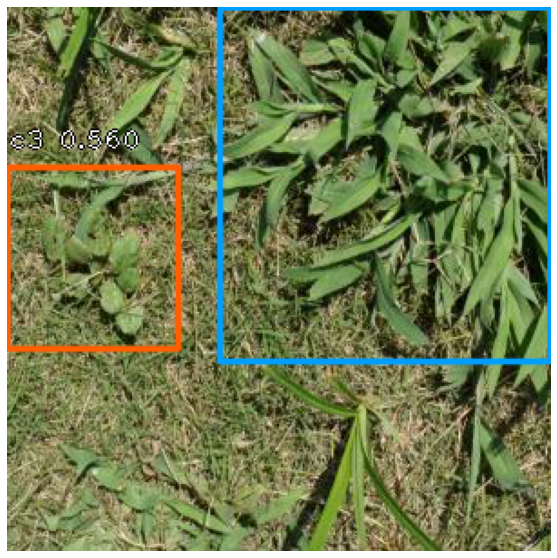

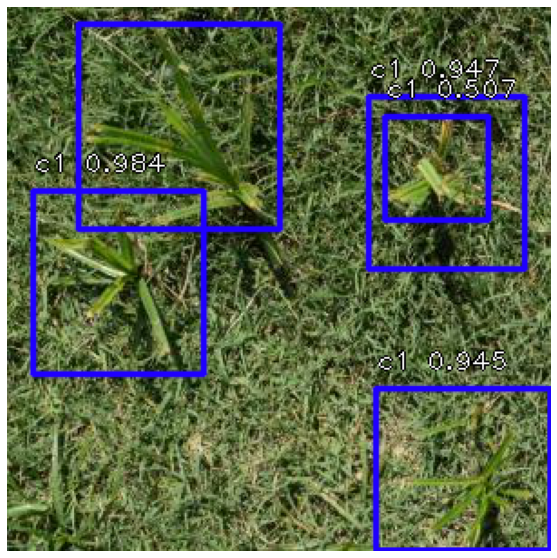

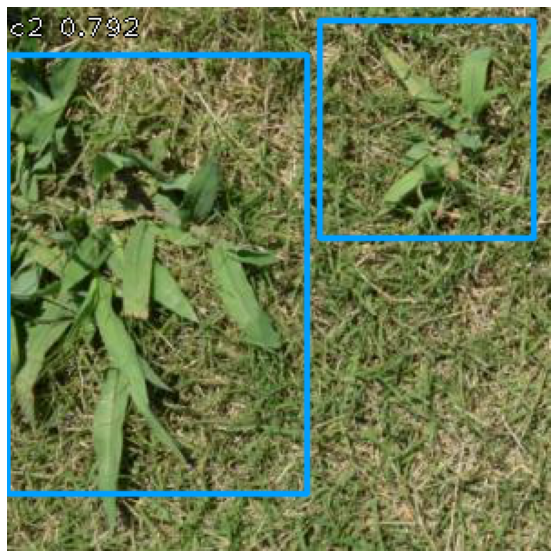

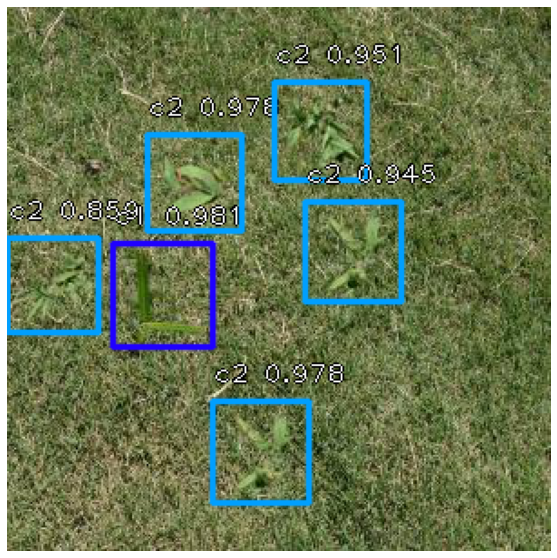

Finished, time per image: 0.06370049052768284


In [11]:
min_score = 0.5 # this is the CNN's confidence that the detection is correct
detection_iterations = 24 # max number of images to visualize

visualize = True

detections = {}
total_time = 0

count = 0
shuffle(image_list)

for image_path in image_list:
    if count > detection_iterations:
        break
    else:
        count +=1
        
    image = read_image_bgr(image_path)
    tileID = []

    if visualize:
        # copy to draw on
        draw = image.copy()
        draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)

    # process image
    start = time.time()
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    total_time += time.time() - start


    # correct for image scale
    boxes /= scale
    if any(score >= min_score for score in scores[0]):
        detections[image_path] = []

    # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break
        if score < min_score:
            break

        #print(score)
        #print(box)

        # TODO this does create a slight error in the boxes, might be worth doing something like
        # list(map(str, box) but then would need to cast on the other end back to float
        b = box.astype(int)
        detections[image_path].append({"box" : b, "label" : label, "score" : score})

        if visualize:
            color = label_color(label)

            # b = box.astype(int)
            draw_box(draw, b, color=color)

            caption = "{} {:.3f}".format(labels_to_names[label], score)
            draw_caption(draw, b, caption)

    if any(score >= min_score for score in scores[0]):
        if visualize:
            plt.figure(figsize=(10, 10))
            plt.axis('off')
            plt.imshow(draw)
            plt.show()
    
print("Finished, time per image:", total_time/len(image_list))

## Define functions for prediction and writing results



In [ ]:
from keras_retinanet.models import load_model

def pred(model_nm, image_list, min_score, write_nm):

  model = load_model(model_nm, backbone_name='resnet50')

  min_score = min_score # this is the CNN's confidence that the detection is correct
  
  detections = {}
  total_time = 0
  count = 0
  shuffle(image_list)
  
  for image_path in image_list:
        
    image = read_image_bgr(image_path)
    tileID = []

    
    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)

    # process image
    start = time.time()
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    total_time += time.time() - start


    # correct for image scale
    boxes /= scale
    if any(score >= min_score for score in scores[0]):
        detections[image_path] = []

    # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break
        if score < min_score:
            break

        #print(score)
        #print(box)

        # TODO this does create a slight error in the boxes, might be worth doing something like
        # list(map(str, box) but then would need to cast on the other end back to float
        b = box.astype(int)
        detections[image_path].append({"box" : b, "label" : label, "score" : score})

    class MyEncoder(json.JSONEncoder):
      def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

    with open(write_nm, 'w') as fp:
      json.dump(detections, fp, cls=MyEncoder)


## Write detections to file

In [ ]:
model_nm = './output/modelBest.h5' # Best-1

#TrainingOutput0/snapshots/modelN21.h5

min_score = 0.5
write_nm = "detection.json"  
pred(model_nm, image_list, min_score, write_nm)

tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
detections

# Run detection on uploaded data

## Define function to upload data


In [ ]:
def img_inference(img_path):
  image = read_image_bgr(img_infer)

  # copy to draw on
  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  # preprocess image for network
  image = preprocess_image(image)
  image, scale = resize_image(image)

  # process image
  start = time.time()
  boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
  print("processing time: ", time.time() - start)

  # correct for image scale
  boxes /= scale

  # visualize detections
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
      # scores are sorted so we can break
      if score < THRES_SCORE:
          break

      color = label_color(label)

      b = box.astype(int)
      draw_box(draw, b, color=color)

      caption = "{} {:.3f}".format(labels_to_names[label], score)
      print(caption)
      draw_caption(draw, b, caption)

  plt.figure(figsize=(10, 10))
  plt.axis('off')
  plt.imshow(draw)
  plt.show()

In [ ]:
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [ ]:
with open('test2/new_detections.json', 'w') as fp:
    json.dump(detections, fp, cls=MyEncoder)

## Upload image and visualize detection



In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ts1.PNG to ts1.PNG
User uploaded file "ts1.PNG" with length 460747 bytes


Running inference on: ts1.PNG
processing time:  0.059814453125
c2 0.989
c2 0.792


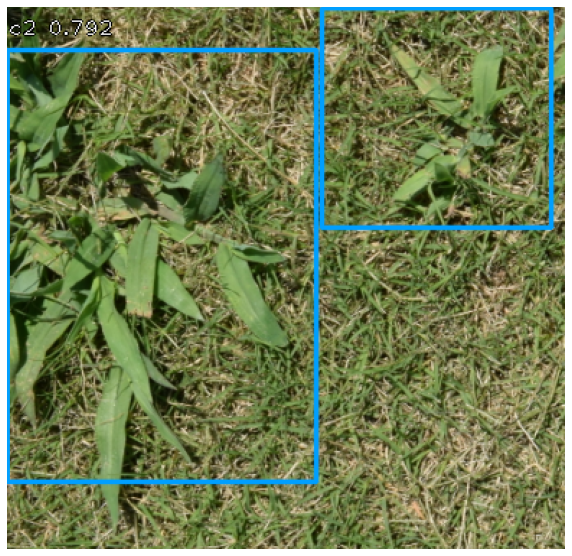

In [ ]:
print('Running inference on: ' + img_infer)
THRES_SCORE = 0.5
img_inference(img_infer)